#### *Violent Incidents Per Person Per Acre **(V.I.P.A)*** - Ajay A. Ohm Nathan, Jacob M. Sobotka, Kambin P. Zarei

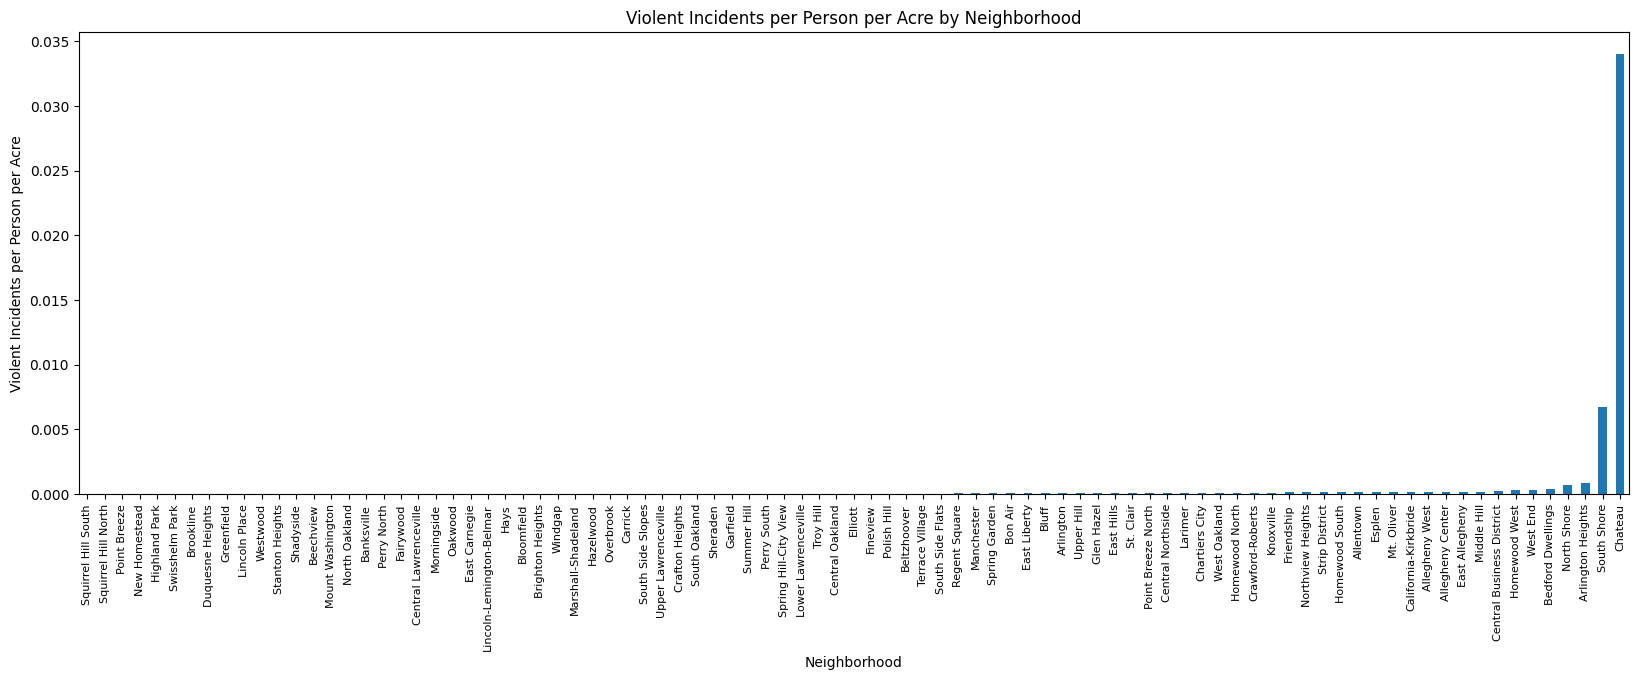

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

land_df = pd.read_csv('LandUsePittNeighborhoods.csv')
v_incidents_df = pd.read_csv("Violent_Incidents.csv")
population_df = pd.read_csv('Population.csv')

# Calculate Violent Incidents Per Person Per Acre for each neighborhood
v_i_p_a = (
    v_incidents_df.pivot_table(index="INCIDENTNEIGHBORHOOD", aggfunc="size") /
    population_df.set_index("Neighborhood")["Estimate; Total"] /
    land_df.set_index("Neighborhood")['Land Area (acres)']
).dropna() # Drop neighborhoods with missing values

# Sort V.I.P.A proportions 
v_i_p_a = v_i_p_a.sort_values(ascending=True)

# Plot V.I.P.A proportions as a bar graph
ax = v_i_p_a.plot.bar(
    figsize=(20, 6),
    legend=False,
    xlabel='Neighborhood',
    ylabel='Violent Incidents per Person per Acre',
    title='Violent Incidents per Person per Acre by Neighborhood',
)

ax.set_xticklabels(ax.get_xticklabels(), rotation=90, fontsize=8)
plt.show()

# We created another data visualization. It is a table. This table shows the exact numbers for the cities with the lowest number of Violent Incidents Per Person Per Acre.
# That way we can see the exact result and not rely on the barely visible bars.


In [11]:
import pandas as pd

# Read the necessary data files
land_df = pd.read_csv('LandUsePittNeighborhoods.csv')
v_incidents_df = pd.read_csv("Violent_Incidents.csv")
population_df = pd.read_csv('Population.csv')

# Calculate Violent Incidents per Person per Acre
v_i_p_a = (
    v_incidents_df.pivot_table(index="INCIDENTNEIGHBORHOOD", aggfunc="size") /
    population_df.set_index("Neighborhood")["Estimate; Total"] /
    land_df.set_index("Neighborhood")['Land Area (acres)']
)

# Create a DataFrame with the required information
v_incidents_data = pd.DataFrame({
    'Violent Incidents': v_incidents_df.groupby('INCIDENTNEIGHBORHOOD').size(),
    'Person': population_df.set_index('Neighborhood')['Estimate; Total'],
    'Acre': land_df.set_index('Neighborhood')['Land Area (acres)'],
    'Violent Incidents per Person per Acre': v_i_p_a
}).dropna() # Drop neighborhoods with missing values 

# Sort the DataFrame by the 'Violent Incidents per Person per Acre' column in ascending order
v_incidents_data = v_incidents_data.sort_values(by='Violent Incidents per Person per Acre')

# Display the DataFrame
print(v_incidents_data)

                     Violent Incidents   Person     Acre  \
Squirrel Hill South               62.0  16042.0  1709.44   
Squirrel Hill North               21.0  11336.0   782.08   
Point Breeze                      13.0   5414.0   642.56   
New Homestead                      2.0    973.0   508.16   
Highland Park                     21.0   6810.0   744.32   
...                                ...      ...      ...   
Bedford Dwellings                 62.0   1349.0   114.56   
North Shore                       29.0    205.0   193.92   
Arlington Heights                 20.0    272.0    84.48   
South Shore                       11.0     12.0   135.68   
Chateau                           25.0      3.0   245.12   

                     Violent Incidents per Person per Acre  
Squirrel Hill South                               0.000002  
Squirrel Hill North                               0.000002  
Point Breeze                                      0.000004  
New Homestead                      

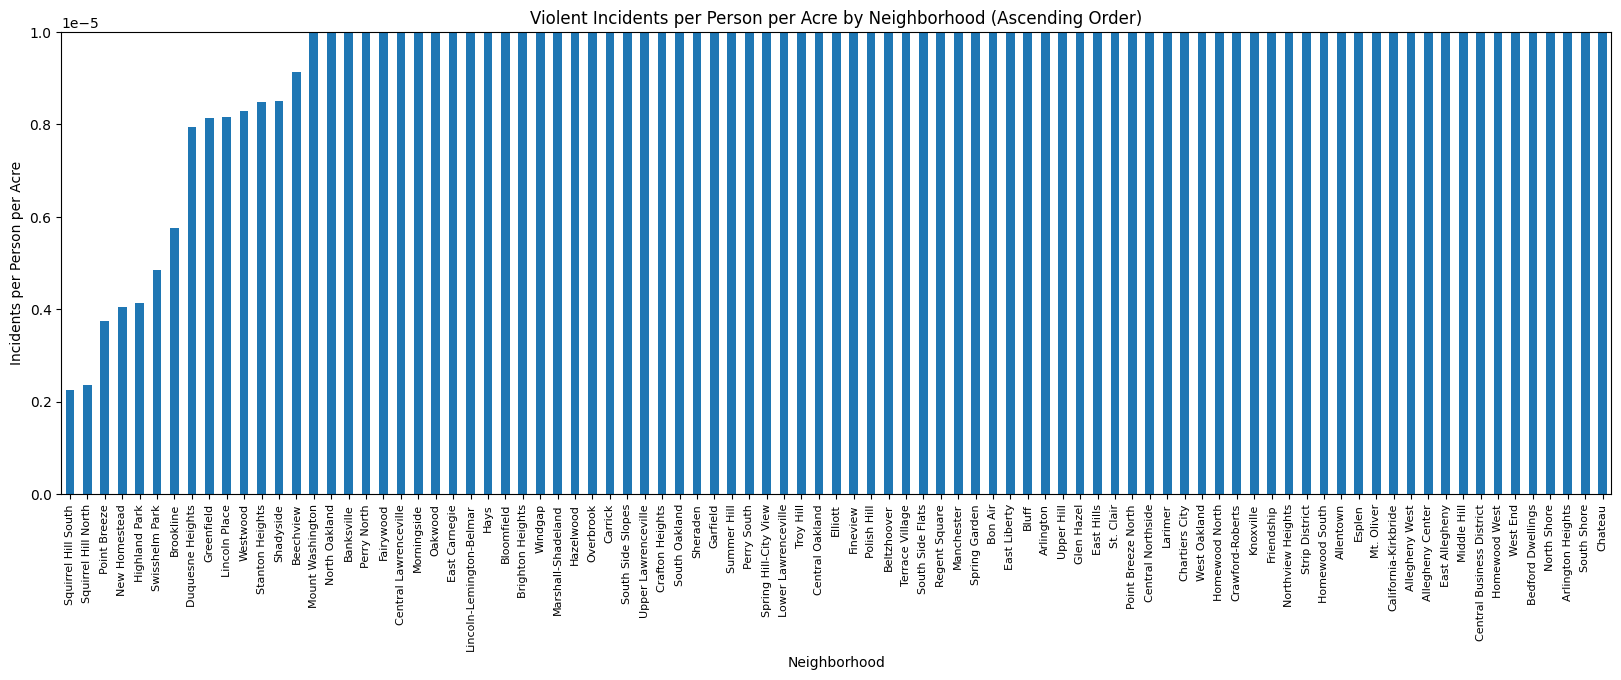

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the necessary data files
land_df = pd.read_csv('LandUsePittNeighborhoods.csv')
v_incidents_df = pd.read_csv("Violent_Incidents.csv")
population_df = pd.read_csv('Population.csv')

# Calculate Incidents per Person per Acre
v_i_p_a = (
    v_incidents_df.pivot_table(index="INCIDENTNEIGHBORHOOD", aggfunc="size") /
    population_df.set_index("Neighborhood")["Estimate; Total"] /
    land_df.set_index("Neighborhood")['Land Area (acres)']
).dropna() # Drop neighborhoods with missing values

# Sort the values for plotting
v_i_p_a = v_i_p_a.sort_values()

# Plot the graph
ax = v_i_p_a.plot.bar(
    figsize=(20, 6),
    legend=False,
    xlabel='Neighborhood',
    ylabel='Incidents per Person per Acre',
    title='Violent Incidents per Person per Acre by Neighborhood (Ascending Order)',
)

ax.set_xticklabels(ax.get_xticklabels(), rotation=90, fontsize=8)

# Set y-axis limits
# This is very important because we want to zoom in on those first few neighborhoods. 
ax.set_ylim(0, 0.00001)
plt.show()

According to our combined analysis and visualization of multiple standards/metrics of living, we named **"Squirrel Hill South"** as the best neighborhood in all of Pittsburgh. This is because it has the best combination of lowest number of violent incidents, highest population, and highest land area. We found this best combination mathematically by taking the number of violent incidents and divided by population divided by area of the neighborhood.

Ajay's Conclusion: I came to the conclusion of population as my sub-metric. This is because Population is how many total people are in an area. I have always thought of the "more the merrier". With more people comes more services, better standard of living for everyone, more social interactions, more friends, parties, and so on. After all, who would want to live in a lonely neighborhood? That is how I came to the conclusion of population to be by sub-metric. More the population, the better. The lower the population, the worse. 